In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import matplotlib.dates as mdates

In [2]:
#reads
bejaia = pd.read_csv('bejaia_region_clean.csv')
sid = pd.read_csv('sidibelabbes_region_clean.csv')
combo = pd.read_csv('regional_clean.csv')
combo['date'] = pd.to_datetime(combo['date'])

## Bejaia Region

### Descriptive Analysis

In [3]:
# Library for headers
bej_full_labels = {
    'temperature': 'Temperature',
    'rh': 'Relative Humidity',
    'ws': 'Wind Speed',
    'rain': 'Rainfall',
    'ffmc': 'Fine Fuel Moisture Code',
    'dmc': 'Duff Moisture Code',
    'dc': 'Drought Code',
    'isi': 'Initial Spread Index',
    'bui': 'Buildup Index',
    'fwi': 'Fire Weather Index'
}

#rename the columns for plotting
bej_renamed = bejaia.rename(columns= bej_full_labels)



In [4]:
bejaia_desc = bej_renamed[['Temperature',
                           'Relative Humidity',
                           'Wind Speed',
                           'Rainfall',
                           'Fine Fuel Moisture Code',
                           'Duff Moisture Code',
                           'Drought Code',
                           'Initial Spread Index',
                           'Buildup Index',
                           'Fire Weather Index']].describe()
bejaia_desc

,Temperature,Relative Humidity,Wind Speed,Rainfall,Fine Fuel Moisture Code,Duff Moisture Code,Drought Code,Initial Spread Index,Buildup Index,Fire Weather Index
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,31.180328,67.975410,16.000000,0.842623,74.672951,12.314754,53.160656,3.655738,15.426230,5.577869
std,3.320401,11.154411,2.848807,2.409208,15.558713,11.274360,51.778265,3.021768,14.474302,6.343051
min,22.000000,45.000000,11.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,29.000000,60.000000,14.000000,0.000000,65.925000,3.725000,10.050000,1.125000,5.100000,0.500000
50%,31.000000,68.000000,16.000000,0.000000,80.900000,9.450000,35.550000,2.650000,11.200000,3.000000
75%,34.000000,77.750000,18.000000,0.500000,86.775000,16.300000,79.025000,5.600000,21.675000,8.700000
max,37.000000,89.000000,26.000000,16.800000,90.300000,54.200000,220.400000,12.500000,67.400000,30.200000


In [5]:
bejaia_weather = bej_renamed[['Temperature', 'Relative Humidity', 'Wind Speed']]
bejaia_weather.describe()

,Temperature,Relative Humidity,Wind Speed
count,122.000000,122.000000,122.000000
mean,31.180328,67.975410,16.000000
std,3.320401,11.154411,2.848807
min,22.000000,45.000000,11.000000
25%,29.000000,60.000000,14.000000
50%,31.000000,68.000000,16.000000
75%,34.000000,77.750000,18.000000
max,37.000000,89.000000,26.000000


In [6]:
bejaia_fwi = bej_renamed[['Fine Fuel Moisture Code',
                          'Duff Moisture Code',
                          'Drought Code',
                          'Initial Spread Index',
                          'Buildup Index',
                          'Fire Weather Index']]
bejaia_fwi.describe()

,Fine Fuel Moisture Code,Duff Moisture Code,Drought Code,Initial Spread Index,Buildup Index,Fire Weather Index
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,74.672951,12.314754,53.160656,3.655738,15.426230,5.577869
std,15.558713,11.274360,51.778265,3.021768,14.474302,6.343051
min,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,65.925000,3.725000,10.050000,1.125000,5.100000,0.500000
50%,80.900000,9.450000,35.550000,2.650000,11.200000,3.000000
75%,86.775000,16.300000,79.025000,5.600000,21.675000,8.700000
max,90.300000,54.200000,220.400000,12.500000,67.400000,30.200000


In [7]:
bejaia_mx = bej_renamed[['Temperature',
                         'Relative Humidity',
                         'Rainfall',
                         'Wind Speed',
                         'Fine Fuel Moisture Code',
                         'Duff Moisture Code',
                         'Drought Code',
                         'Initial Spread Index',
                         'Buildup Index',
                         'Fire Weather Index']].corr()
bejaia_mx

,Temperature,Relative Humidity,Rainfall,Wind Speed,Fine Fuel Moisture Code,Duff Moisture Code,Drought Code,Initial Spread Index,Buildup Index,Fire Weather Index
Temperature,1.000000,-0.660151,-0.486947,-0.228035,0.748423,0.541489,0.532838,0.663871,0.542210,0.608367
Relative Humidity,-0.660151,1.000000,0.329163,0.245774,-0.653153,-0.347080,-0.314271,-0.586410,-0.338233,-0.476067
Rainfall,-0.486947,0.329163,1.000000,0.349321,-0.573476,-0.265371,-0.283652,-0.366425,-0.271951,-0.292914
Wind Speed,-0.228035,0.245774,0.349321,1.000000,-0.211069,0.039394,0.099231,-0.039266,0.062212,0.029637
Fine Fuel Moisture Code,0.748423,-0.653153,-0.573476,-0.211069,1.000000,0.608512,0.575221,0.790086,0.600707,0.675553
Duff Moisture Code,0.541489,-0.347080,-0.265371,0.039394,0.608512,1.000000,0.962193,0.750098,0.995551,0.901759
Drought Code,0.532838,-0.314271,-0.283652,0.099231,0.575221,0.962193,1.000000,0.717591,0.982554,0.869911
Initial Spread Index,0.663871,-0.586410,-0.366425,-0.039266,0.790086,0.750098,0.717591,1.000000,0.746761,0.944062
Buildup Index,0.542210,-0.338233,-0.271951,0.062212,0.600707,0.995551,0.982554,0.746761,1.000000,0.900417
Fire Weather Index,0.608367,-0.476067,-0.292914,0.029637,0.675553,0.901759,0.869911,0.944062,0.900417,1.000000


In [8]:
bejaia_weather_mx = bejaia_weather.corr()
bejaia_weather_mx

,Temperature,Relative Humidity,Wind Speed
Temperature,1.000000,-0.660151,-0.228035
Relative Humidity,-0.660151,1.000000,0.245774
Wind Speed,-0.228035,0.245774,1.000000


In [9]:
bejaia_fwi_mx = bejaia_fwi.corr()
bejaia_fwi_mx

,Fine Fuel Moisture Code,Duff Moisture Code,Drought Code,Initial Spread Index,Buildup Index,Fire Weather Index
Fine Fuel Moisture Code,1.000000,0.608512,0.575221,0.790086,0.600707,0.675553
Duff Moisture Code,0.608512,1.000000,0.962193,0.750098,0.995551,0.901759
Drought Code,0.575221,0.962193,1.000000,0.717591,0.982554,0.869911
Initial Spread Index,0.790086,0.750098,0.717591,1.000000,0.746761,0.944062
Buildup Index,0.600707,0.995551,0.982554,0.746761,1.000000,0.900417
Fire Weather Index,0.675553,0.901759,0.869911,0.944062,0.900417,1.000000


### Visuals

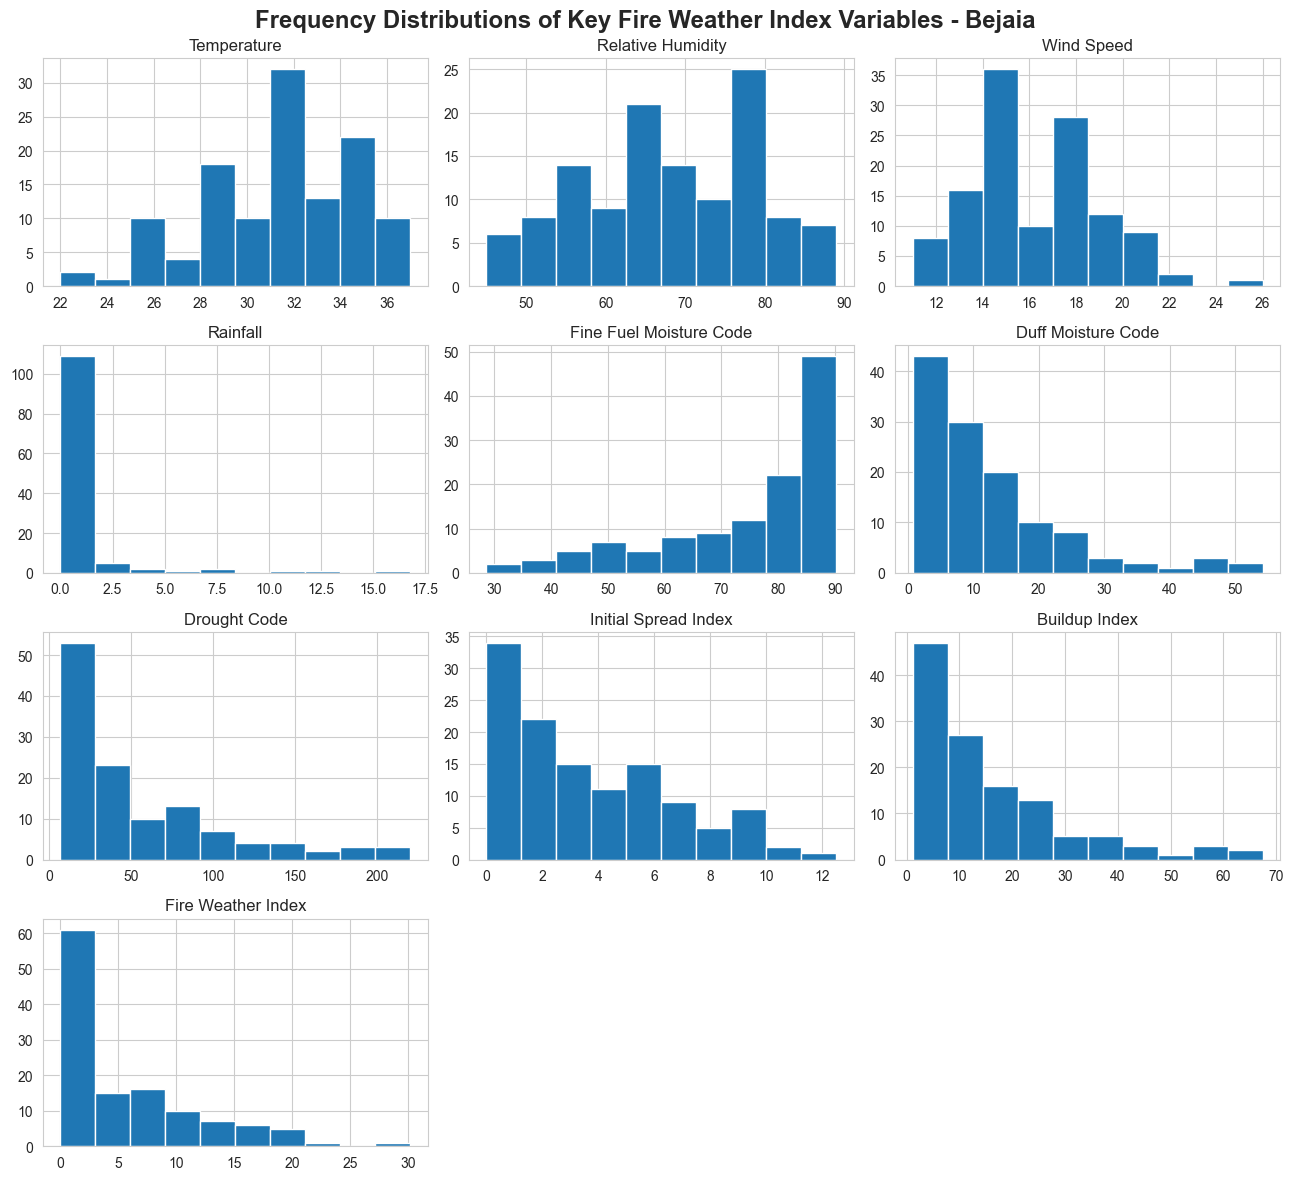

In [10]:
# Distributions
sns.set_style('whitegrid')
bej_renamed[['Temperature',
            'Relative Humidity',
            'Wind Speed',
            'Rainfall',
            'Fine Fuel Moisture Code',
            'Duff Moisture Code',
            'Drought Code',
            'Initial Spread Index',
            'Buildup Index',
            'Fire Weather Index']].hist(figsize=(13, 12))
plt.suptitle('Frequency Distributions of Key Fire Weather Index Variables - Bejaia',
             fontsize = 'xx-large', 
             weight = 'bold')

plt.tight_layout()
plt.show()

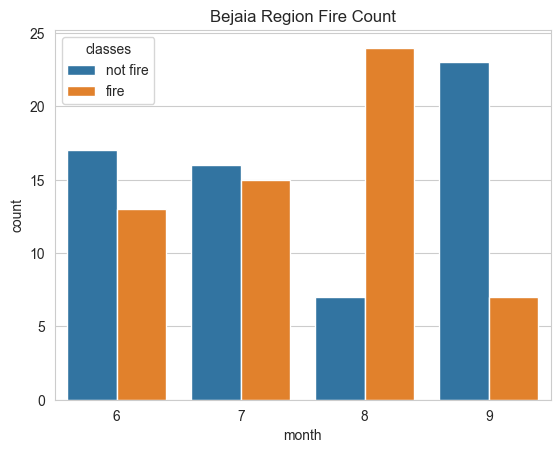

In [11]:
sns.set_style('whitegrid')
sns.countplot(data = bejaia, x = 'month', hue = 'classes').set_title('Bejaia Region Fire Count')
plt.show()

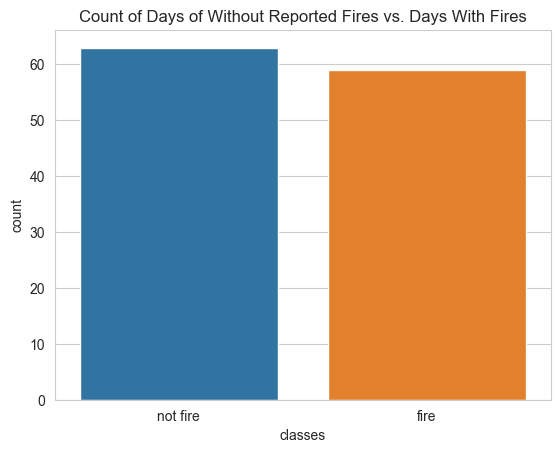

In [12]:
sns.set_style('whitegrid')
sns.countplot(data = bejaia, x = 'classes', hue = 'classes').set_title('Count of Days of Without Reported Fires vs. Days With Fires')
plt.show()

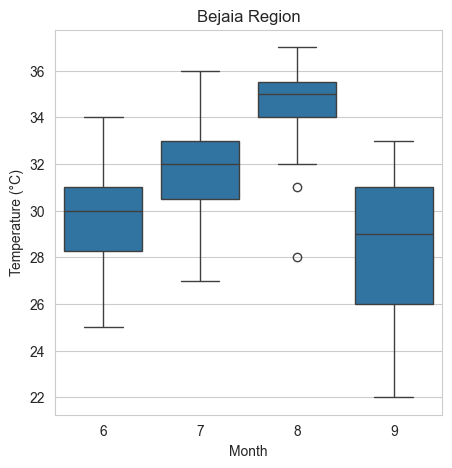

In [13]:
sns.set_style('whitegrid')
plt.figure(figsize=(5,5))
sns.boxplot(data=bej_renamed, x = 'month', y= 'Temperature')
plt.title('Bejaia Region')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.show()

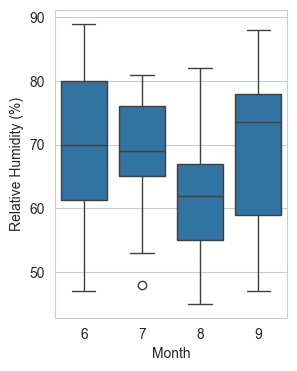

In [14]:
sns.set_style('whitegrid')
plt.figure(figsize=(3,4))
sns.boxplot(data=bej_renamed, x = 'month', y= 'Relative Humidity')
plt.xlabel('Month')
plt.ylabel('Relative Humidity (%)')
plt.show()

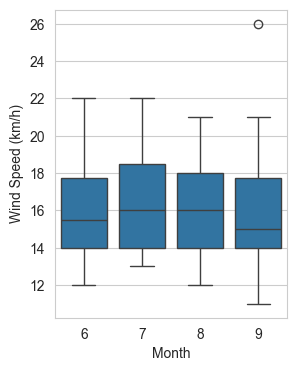

In [15]:
sns.set_style('whitegrid')
plt.figure(figsize=(3,4))
sns.boxplot(data=bej_renamed, x = 'month', y= 'Wind Speed')
plt.xlabel('Month')
plt.ylabel('Wind Speed (km/h)')
plt.show()

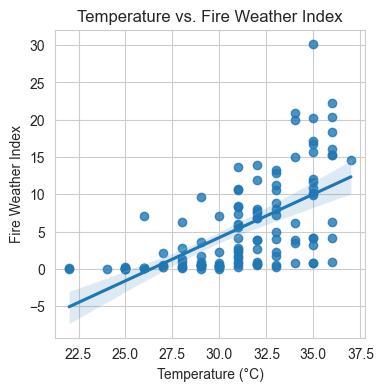

In [16]:
sns.set_style('whitegrid')
plt.figure(figsize=(4,4))
sns.regplot(x='Temperature', y='Fire Weather Index', data=bej_renamed)
plt.title('Temperature vs. Fire Weather Index')
plt.xlabel('Temperature (°C)')
plt.show()

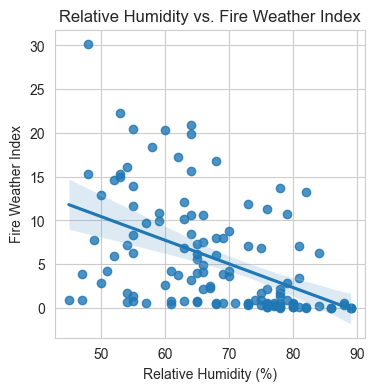

In [17]:
plt.figure(figsize=(4,4))
sns.regplot(x='Relative Humidity', y='Fire Weather Index', data=bej_renamed)
plt.title('Relative Humidity vs. Fire Weather Index')
plt.xlabel('Relative Humidity (%)')
plt.show()

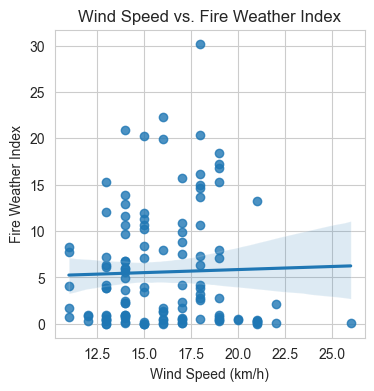

In [18]:
plt.figure(figsize=(4,4))
sns.regplot(x='Wind Speed', y='Fire Weather Index', data=bej_renamed)
plt.title('Wind Speed vs. Fire Weather Index')
plt.xlabel('Wind Speed (km/h)')
plt.show()

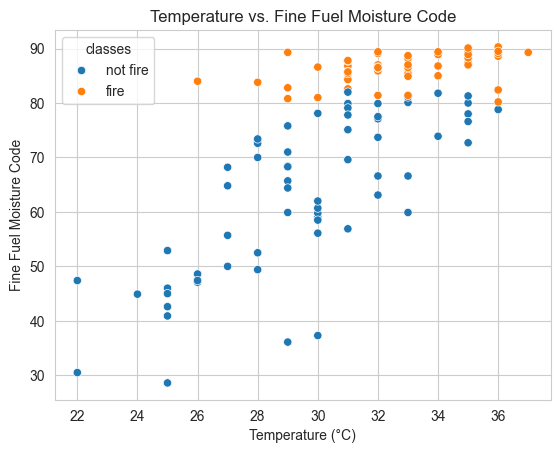

In [19]:
sns.scatterplot(x='Temperature', y='Fine Fuel Moisture Code', data=bej_renamed, hue = 'classes')
plt.title('Temperature vs. Fine Fuel Moisture Code')
plt.xlabel('Temperature (°C)')
plt.show()

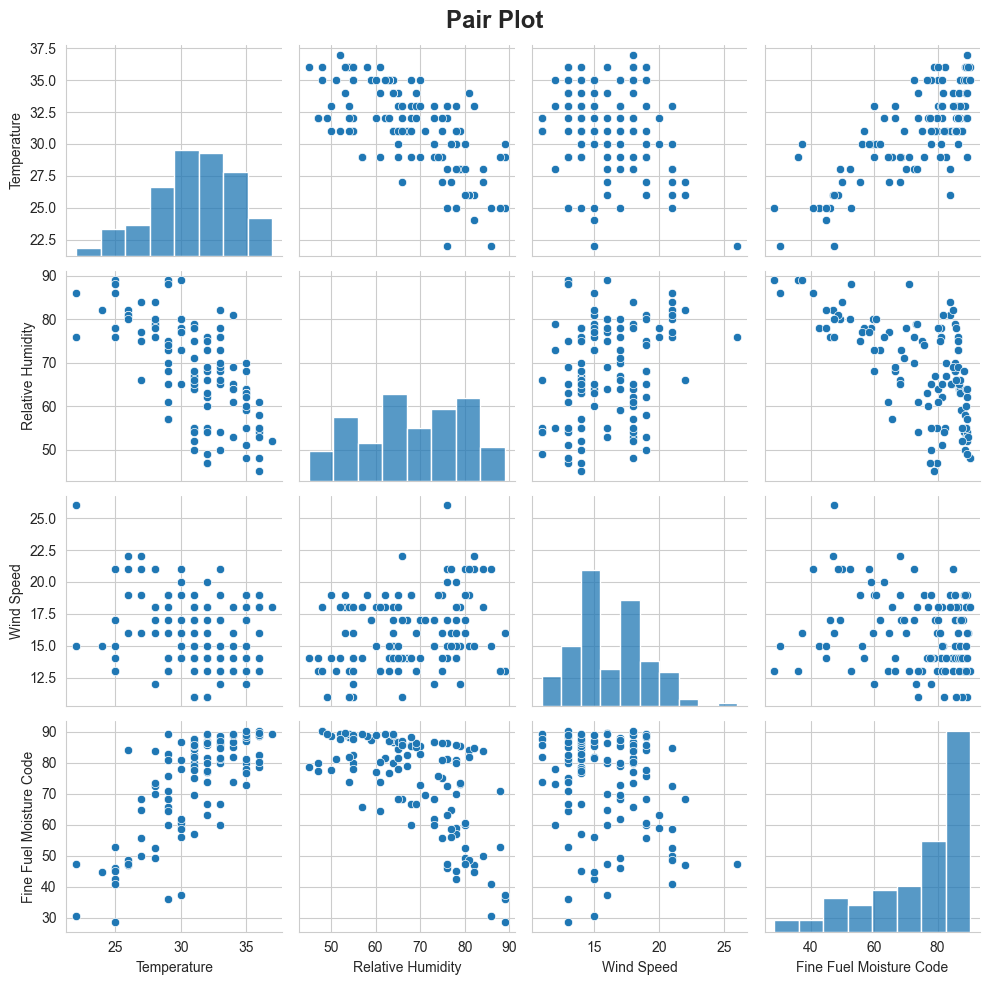

In [20]:
sns.set_style('whitegrid')
sns.pairplot(bej_renamed[['Temperature',
                         'Relative Humidity',
                         'Wind Speed',
                         'Fine Fuel Moisture Code']])
plt.suptitle('Pair Plot',
             fontsize = 'xx-large', 
             weight = 'bold')
plt.tight_layout()
plt.show()

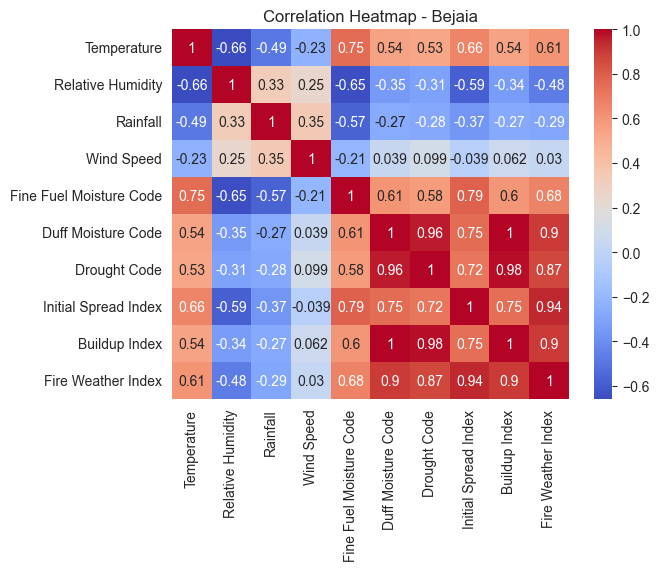

In [21]:
sns.heatmap(bejaia_mx, cmap='coolwarm', annot= True)
plt.title('Correlation Heatmap - Bejaia')
plt.show()

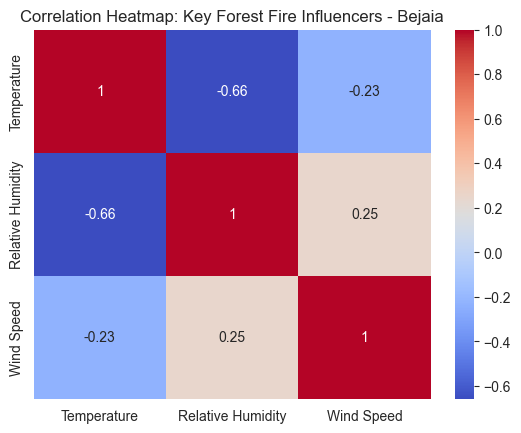

In [22]:
sns.heatmap(bejaia_weather_mx, cmap= 'coolwarm', annot= True)
plt.title('Correlation Heatmap: Key Forest Fire Influencers - Bejaia')
plt.show()

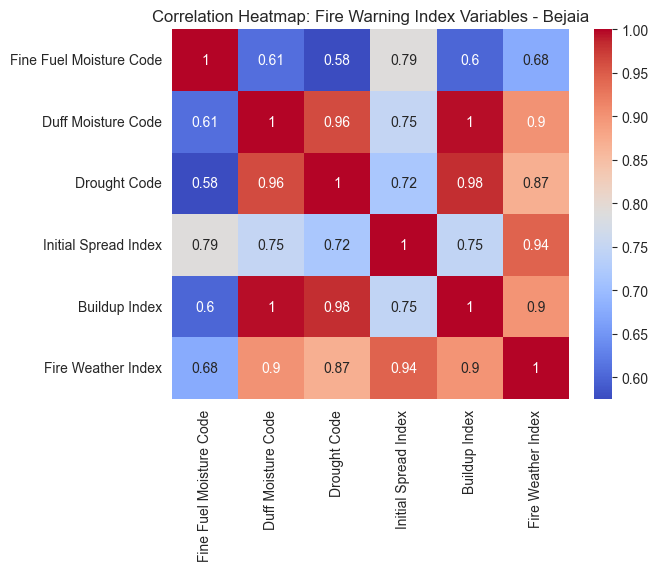

In [23]:
sns.heatmap(bejaia_fwi_mx, cmap= 'coolwarm', annot= True)
plt.title('Correlation Heatmap: Fire Warning Index Variables - Bejaia')
plt.show()

## Sidi Bel-Abbas Region

### Descriptive Analysis

In [24]:
# Library for headers
sid_full_labels = {
    'temperature': 'Temperature',
    'rh': 'Relative Humidity',
    'ws': 'Wind Speed',
    'rain': 'Rainfall',
    'ffmc': 'Fine Fuel Moisture Code',
    'dmc': 'Duff Moisture Code',
    'dc': 'Drought Code',
    'isi': 'Initial Spread Index',
    'bui': 'Buildup Index',
    'fwi': 'Fire Weather Index'
}

#rename the columns for plotting
sid_renamed = sid.rename(columns= sid_full_labels)



In [25]:
sid_desc = sid_renamed[['Temperature',
                           'Relative Humidity',
                           'Wind Speed',
                           'Rainfall',
                           'Fine Fuel Moisture Code',
                           'Duff Moisture Code',
                           'Drought Code',
                           'Initial Spread Index',
                           'Buildup Index',
                           'Fire Weather Index']].describe()
sid_desc

,Temperature,Relative Humidity,Wind Speed,Rainfall,Fine Fuel Moisture Code,Duff Moisture Code,Drought Code,Initial Spread Index,Buildup Index,Fire Weather Index
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,121.000000
mean,33.163934,55.901639,15.008197,0.678689,81.102459,17.031967,45.415574,5.892623,17.903279,8.504959
std,3.675608,15.716186,2.692186,1.486759,12.244064,12.995068,42.927562,4.832913,13.878868,8.169444
min,24.000000,21.000000,6.000000,0.000000,37.900000,0.900000,7.300000,0.100000,1.400000,0.000000
25%,30.000000,43.250000,14.000000,0.000000,77.650000,7.325000,14.700000,1.825000,7.400000,0.900000
50%,34.000000,56.000000,15.000000,0.000000,84.850000,13.150000,31.500000,4.600000,13.900000,6.000000
75%,36.000000,66.750000,16.750000,0.475000,89.275000,22.900000,56.975000,8.625000,23.875000,13.700000
max,42.000000,90.000000,29.000000,8.700000,96.000000,65.900000,177.300000,19.000000,68.000000,31.100000


In [26]:
sid_weather = sid_renamed[['Temperature', 'Relative Humidity', 'Wind Speed']]
sid_weather.describe()

,Temperature,Relative Humidity,Wind Speed
count,122.000000,122.000000,122.000000
mean,33.163934,55.901639,15.008197
std,3.675608,15.716186,2.692186
min,24.000000,21.000000,6.000000
25%,30.000000,43.250000,14.000000
50%,34.000000,56.000000,15.000000
75%,36.000000,66.750000,16.750000
max,42.000000,90.000000,29.000000


In [27]:
sid_fwi = sid_renamed[['Fine Fuel Moisture Code',
                          'Duff Moisture Code',
                          'Drought Code',
                          'Initial Spread Index',
                          'Buildup Index',
                          'Fire Weather Index']]
sid_fwi.describe()

,Fine Fuel Moisture Code,Duff Moisture Code,Drought Code,Initial Spread Index,Buildup Index,Fire Weather Index
count,122.000000,122.000000,122.000000,122.000000,122.000000,121.000000
mean,81.102459,17.031967,45.415574,5.892623,17.903279,8.504959
std,12.244064,12.995068,42.927562,4.832913,13.878868,8.169444
min,37.900000,0.900000,7.300000,0.100000,1.400000,0.000000
25%,77.650000,7.325000,14.700000,1.825000,7.400000,0.900000
50%,84.850000,13.150000,31.500000,4.600000,13.900000,6.000000
75%,89.275000,22.900000,56.975000,8.625000,23.875000,13.700000
max,96.000000,65.900000,177.300000,19.000000,68.000000,31.100000


In [28]:
sid_mx = sid_renamed[['Temperature',
                      'Relative Humidity',
                      'Rainfall',
                      'Wind Speed',
                      'Fine Fuel Moisture Code',
                      'Duff Moisture Code',
                      'Drought Code',
                      'Initial Spread Index',
                      'Buildup Index',
                      'Fire Weather Index']].corr()
sid_mx

,Temperature,Relative Humidity,Rainfall,Wind Speed,Fine Fuel Moisture Code,Duff Moisture Code,Drought Code,Initial Spread Index,Buildup Index,Fire Weather Index
Temperature,1.000000,-0.598309,-0.129718,-0.258208,0.573122,0.389748,0.284506,0.541235,0.366237,0.500971
Relative Humidity,-0.598309,1.000000,0.149027,0.141436,-0.645540,-0.379057,-0.265698,-0.695343,-0.359088,-0.605856
Rainfall,-0.129718,0.149027,1.000000,-0.139740,-0.510498,-0.348431,-0.344823,-0.412902,-0.357449,-0.410213
Wind Speed,-0.258208,0.141436,-0.139740,1.000000,-0.019406,0.028765,0.017140,0.139555,0.028333,0.106128
Fine Fuel Moisture Code,0.573122,-0.645540,-0.510498,-0.019406,1.000000,0.581300,0.480658,0.752622,0.575892,0.719593
Duff Moisture Code,0.389748,-0.379057,-0.348431,0.028765,0.581300,1.000000,0.882122,0.622198,0.987739,0.852193
Drought Code,0.284506,-0.265698,-0.344823,0.017140,0.480658,0.882122,1.000000,0.461145,0.927885,0.716965
Initial Spread Index,0.541235,-0.695343,-0.412902,0.139555,0.752622,0.622198,0.461145,1.000000,0.600600,0.916427
Buildup Index,0.366237,-0.359088,-0.357449,0.028333,0.575892,0.987739,0.927885,0.600600,1.000000,0.844715
Fire Weather Index,0.500971,-0.605856,-0.410213,0.106128,0.719593,0.852193,0.716965,0.916427,0.844715,1.000000


In [29]:
sid_weather_mx = sid_weather.corr()
sid_weather_mx

,Temperature,Relative Humidity,Wind Speed
Temperature,1.000000,-0.598309,-0.258208
Relative Humidity,-0.598309,1.000000,0.141436
Wind Speed,-0.258208,0.141436,1.000000


In [30]:
sid_fwi_mx = sid_fwi.corr()
sid_fwi_mx

,Fine Fuel Moisture Code,Duff Moisture Code,Drought Code,Initial Spread Index,Buildup Index,Fire Weather Index
Fine Fuel Moisture Code,1.000000,0.581300,0.480658,0.752622,0.575892,0.719593
Duff Moisture Code,0.581300,1.000000,0.882122,0.622198,0.987739,0.852193
Drought Code,0.480658,0.882122,1.000000,0.461145,0.927885,0.716965
Initial Spread Index,0.752622,0.622198,0.461145,1.000000,0.600600,0.916427
Buildup Index,0.575892,0.987739,0.927885,0.600600,1.000000,0.844715
Fire Weather Index,0.719593,0.852193,0.716965,0.916427,0.844715,1.000000


### Visuals

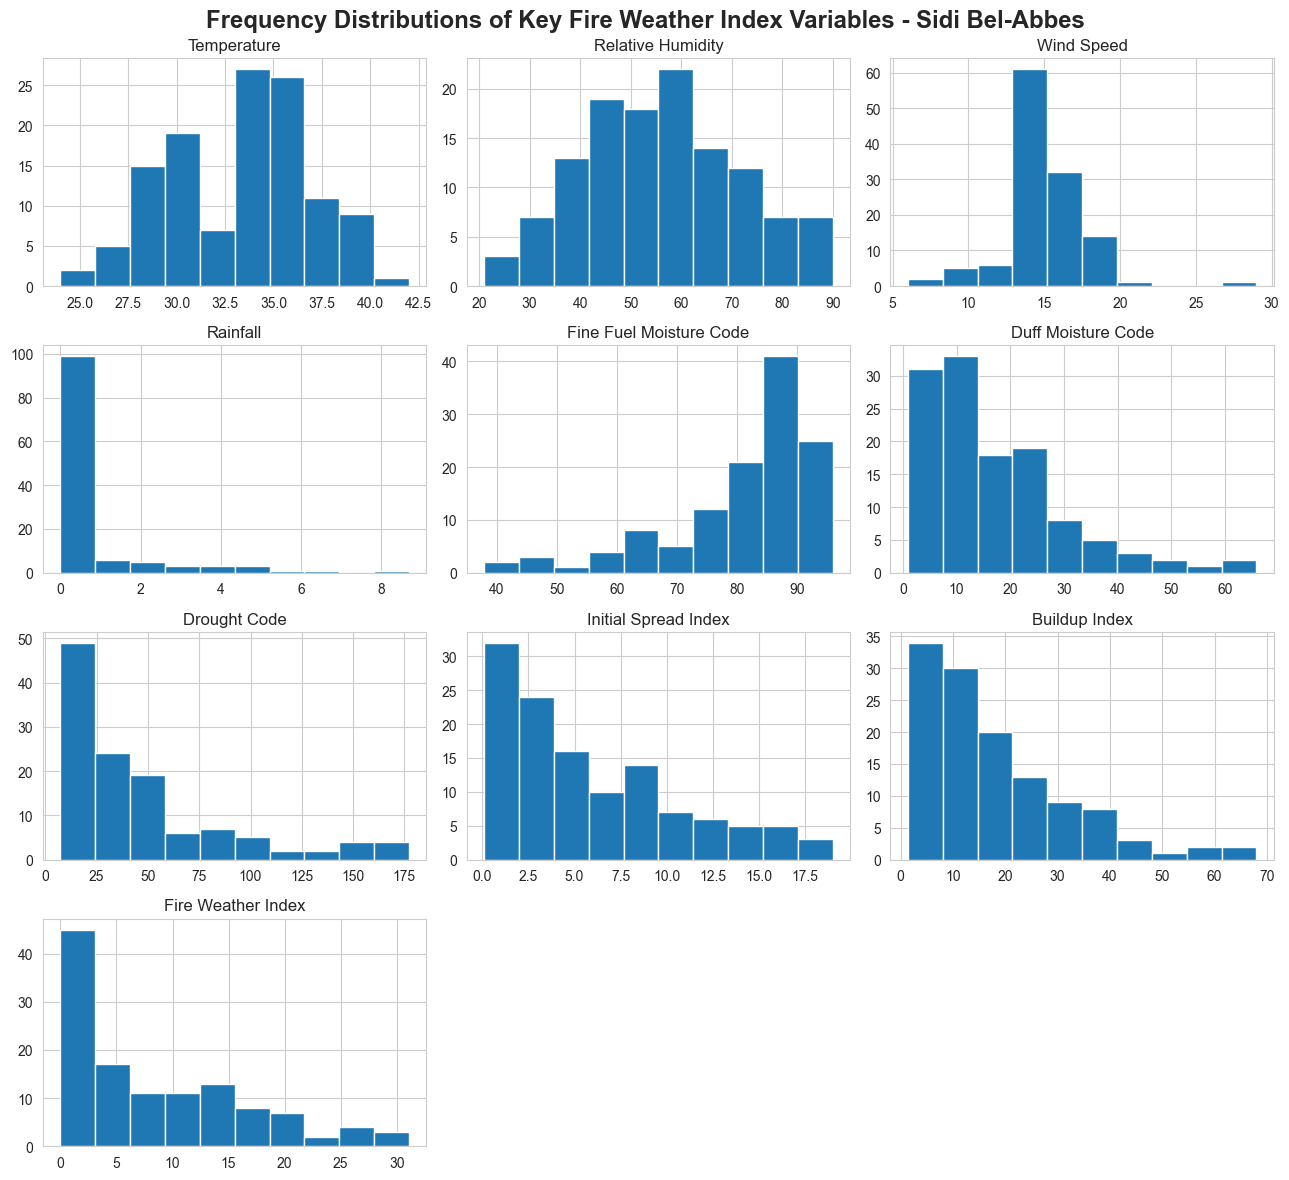

In [31]:
# Distributions
sns.set_style('whitegrid')
sid_renamed[['Temperature',
            'Relative Humidity',
            'Wind Speed',
            'Rainfall',
            'Fine Fuel Moisture Code',
            'Duff Moisture Code',
            'Drought Code',
            'Initial Spread Index',
            'Buildup Index',
            'Fire Weather Index']].hist(figsize=(13, 12))
plt.suptitle('Frequency Distributions of Key Fire Weather Index Variables - Sidi Bel-Abbes',
             fontsize = 'xx-large', 
             weight = 'bold')

plt.tight_layout()
plt.show()

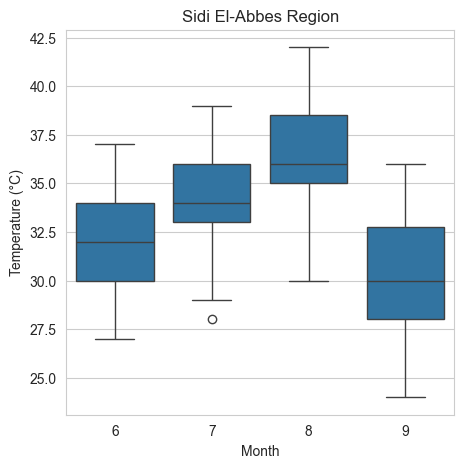

In [32]:
sns.set_style('whitegrid')
plt.figure(figsize=(5,5))
sns.boxplot(data=sid_renamed, x = 'month', y= 'Temperature')
plt.title('Sidi El-Abbes Region')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.show()

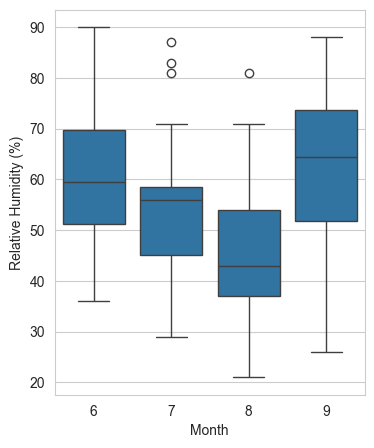

In [33]:
sns.set_style('whitegrid')
plt.figure(figsize=(4,5))
sns.boxplot(data=sid_renamed, x = 'month', y= 'Relative Humidity')
plt.xlabel('Month')
plt.ylabel('Relative Humidity (%)')
plt.show()

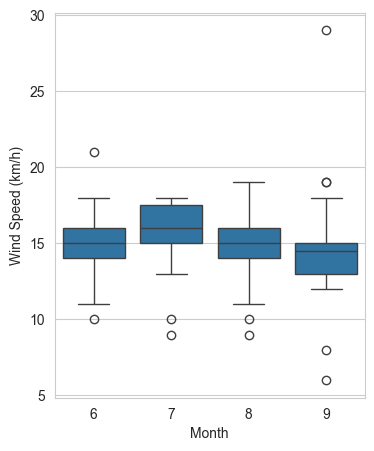

In [34]:
sns.set_style('whitegrid')
plt.figure(figsize=(4,5))
sns.boxplot(data=sid_renamed, x = 'month', y= 'Wind Speed')
plt.xlabel('Month')
plt.ylabel('Wind Speed (km/h)')
plt.show()

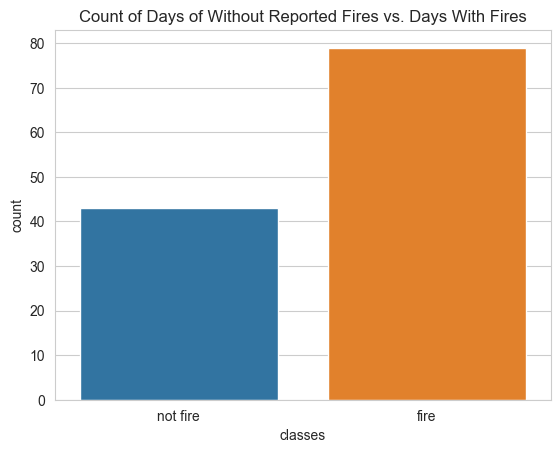

In [35]:
sns.set_style('whitegrid')
sns.countplot(data = sid, x = 'classes', hue = 'classes').set_title('Count of Days of Without Reported Fires vs. Days With Fires')
plt.show()

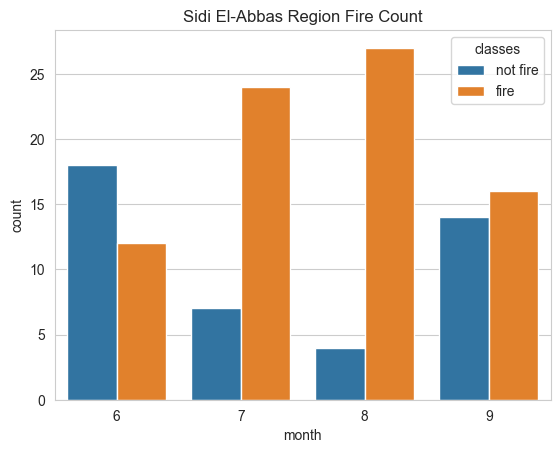

In [36]:
sns.set_style('whitegrid')
sns.countplot(data = sid, x = 'month', hue = 'classes').set_title('Sidi El-Abbas Region Fire Count')
plt.show()

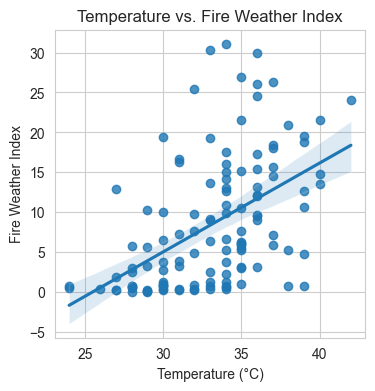

In [37]:
sns.set_style('whitegrid')
plt.figure(figsize=(4,4))
sns.regplot(x='Temperature', y='Fire Weather Index', data=sid_renamed)
plt.title('Temperature vs. Fire Weather Index')
plt.xlabel('Temperature (°C)')
plt.show()

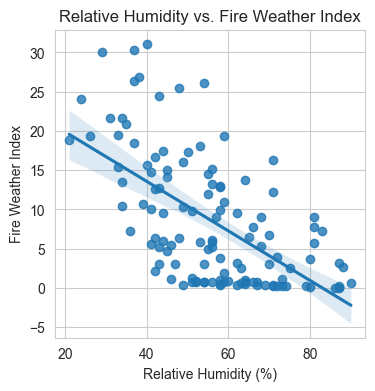

In [38]:
plt.figure(figsize=(4,4))
sns.regplot(x='Relative Humidity', y='Fire Weather Index', data=sid_renamed)
plt.title('Relative Humidity vs. Fire Weather Index')
plt.xlabel('Relative Humidity (%)')
plt.show()

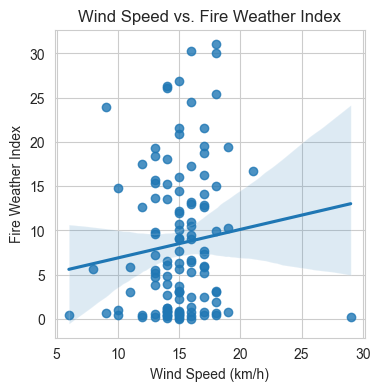

In [39]:
plt.figure(figsize=(4,4))
sns.regplot(x='Wind Speed', y='Fire Weather Index', data=sid_renamed)
plt.title('Wind Speed vs. Fire Weather Index')
plt.xlabel('Wind Speed (km/h)')
plt.show()

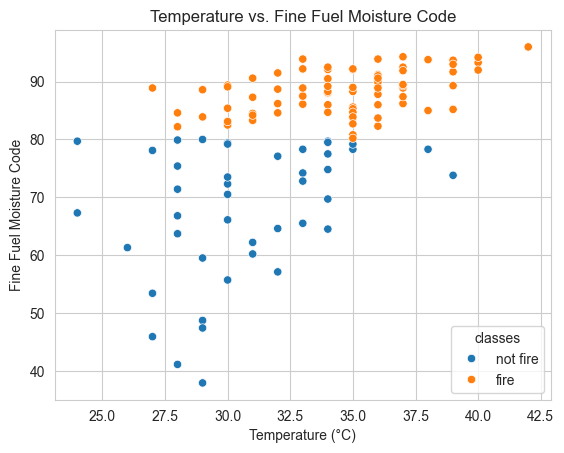

In [40]:
sns.scatterplot(x='Temperature', y='Fine Fuel Moisture Code', data=sid_renamed, hue = 'classes')
plt.title('Temperature vs. Fine Fuel Moisture Code')
plt.xlabel('Temperature (°C)')
plt.show()

In [41]:
count = 0
for i in combo['rain'] :
    if i > 2 :
        count = count + 1
count

23

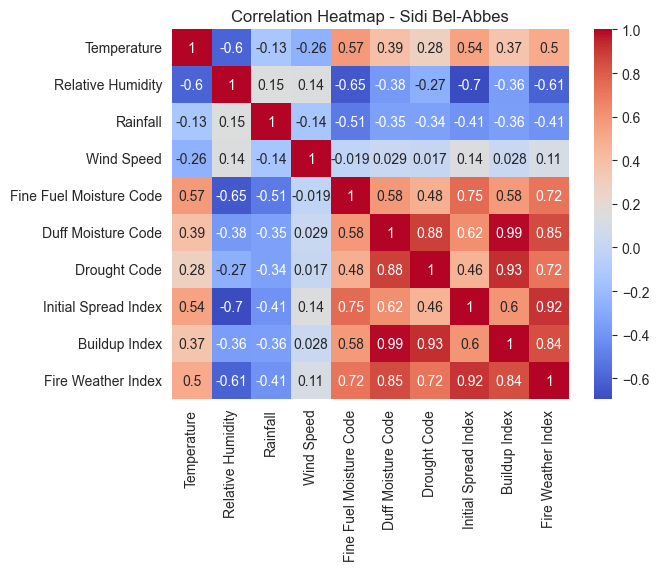

In [42]:
sns.heatmap(sid_mx, cmap='coolwarm', annot= True)
plt.title('Correlation Heatmap - Sidi Bel-Abbes')
plt.show()

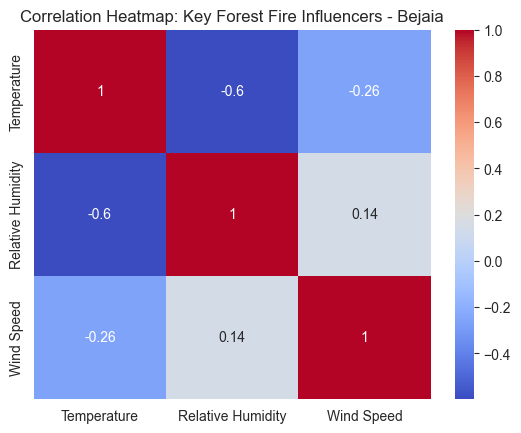

In [43]:
sns.heatmap(sid_weather_mx, cmap= 'coolwarm', annot= True)
plt.title('Correlation Heatmap: Key Forest Fire Influencers - Bejaia')
plt.show()

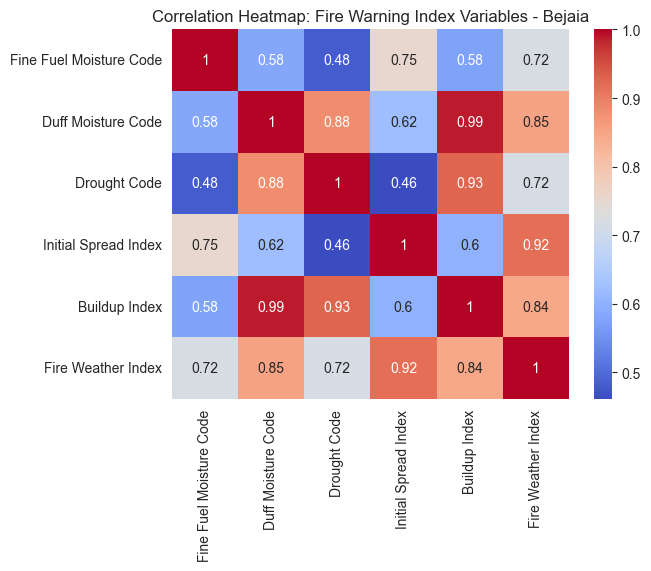

In [44]:
sns.heatmap(sid_fwi_mx, cmap= 'coolwarm', annot= True)
plt.title('Correlation Heatmap: Fire Warning Index Variables - Bejaia')
plt.show()

## Both Regions

In [45]:
# Library for table headers
combo_full_labels = {
    'temperature': 'Temperature',
    'rh': 'Relative Humidity',
    'ws': 'Wind Speed',
    'rain': 'Rainfall',
    'ffmc': 'Fine Fuel Moisture Code',
    'dmc': 'Duff Moisture Code',
    'dc': 'Drought Code',
    'isi': 'Initial Spread Index',
    'bui': 'Buildup Index',
    'fwi': 'Fire Weather Index'
}

# Rename the columns for plotting
combo_renamed = combo.rename(columns=combo_full_labels)

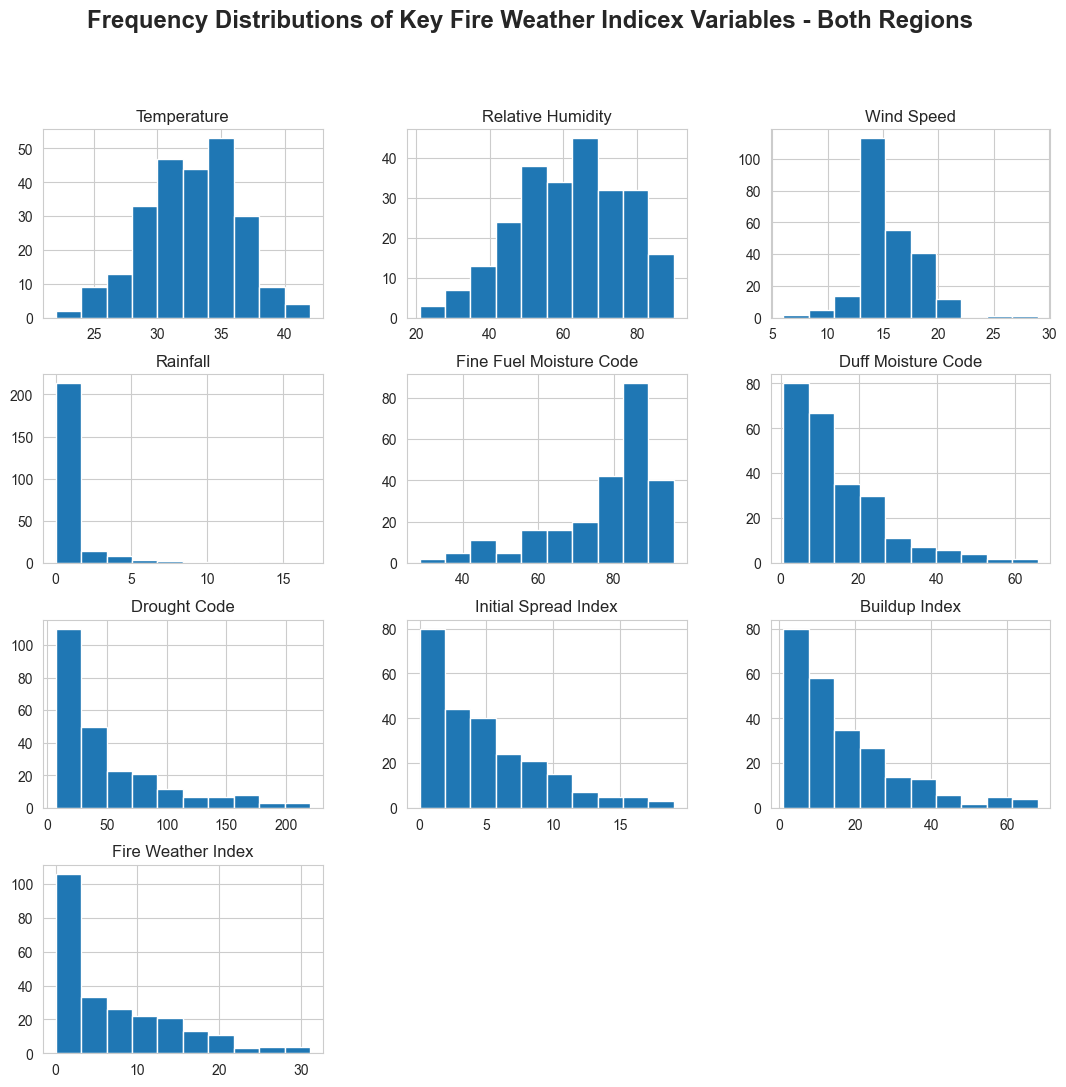

In [46]:
combo_renamed[['Temperature',
            'Relative Humidity',
            'Wind Speed',
            'Rainfall',
            'Fine Fuel Moisture Code',
            'Duff Moisture Code',
            'Drought Code',
            'Initial Spread Index',
            'Buildup Index',
            'Fire Weather Index']].hist(figsize = (13, 12))
plt.suptitle('Frequency Distributions of Key Fire Weather Indicex Variables - Both Regions',
             fontsize = 'xx-large', 
             weight = 'bold')
plt.tight_layout
plt.show()

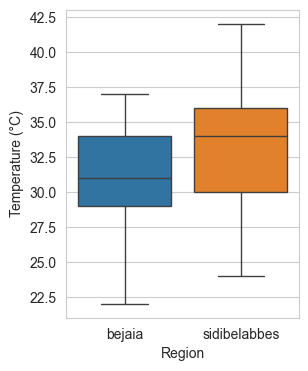

In [47]:
sns.set_style('whitegrid')
plt.figure(figsize=(3,4))
sns.boxplot(data=combo_renamed, x = 'region', y= 'Temperature', hue = 'region')
plt.xlabel('Region')
plt.ylabel('Temperature (°C)')
plt.show()

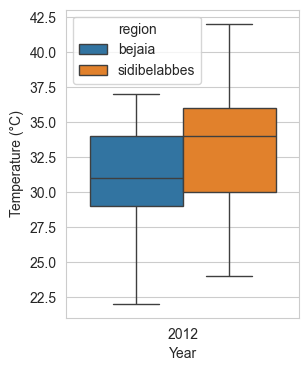

In [48]:
sns.set_style('whitegrid')
plt.figure(figsize=(3,4))
sns.boxplot(data=combo_renamed, x = 'year', y= 'Temperature', hue = 'region')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.show()

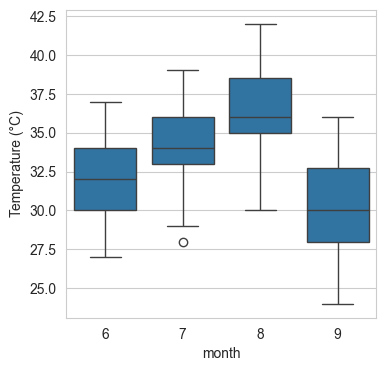

In [49]:
plt.figure(figsize=(4,4))
sns.boxplot(data=sid_renamed, x = 'month', y = 'Temperature')
plt.ylabel('Temperature (°C)')
plt.show()

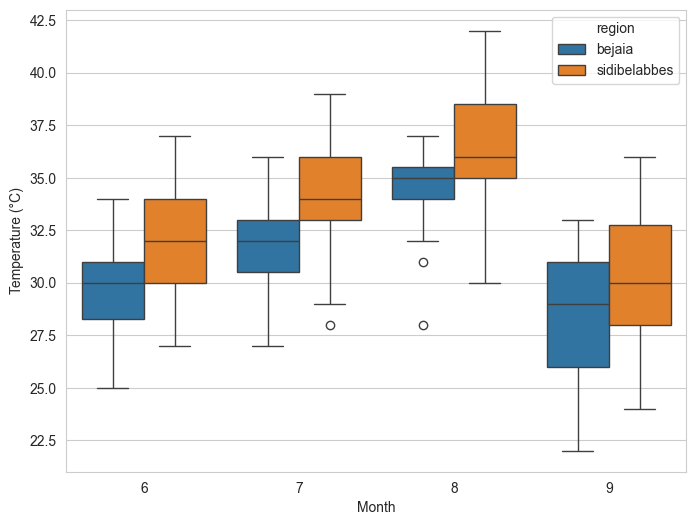

In [50]:
plt.figure(figsize=(8,6))
sns.boxplot(data=combo_renamed, x = 'month', y = 'Temperature', hue = 'region')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.show()

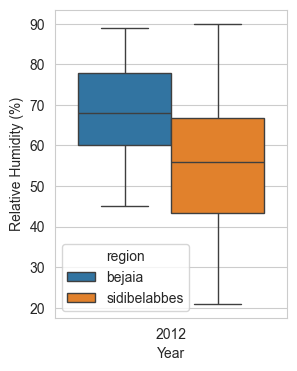

In [51]:
plt.figure(figsize=(3,4))
sns.boxplot(data=combo_renamed, x = 'year', y= 'Relative Humidity', hue = 'region')
plt.xlabel('Year')
plt.ylabel('Relative Humidity (%)')
plt.show()

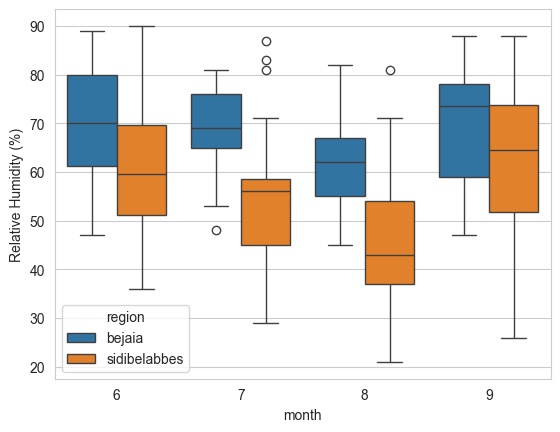

In [52]:
sns.boxplot(data=combo_renamed, x = 'month', y = 'Relative Humidity', hue = 'region')
plt.ylabel('Relative Humidity (%)')
plt.show()

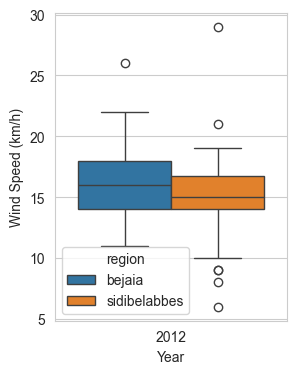

In [53]:
plt.figure(figsize=(3,4))
sns.boxplot(data=combo_renamed, x = 'year', y= 'Wind Speed', hue = 'region')
plt.xlabel('Year')
plt.ylabel('Wind Speed (km/h)')
plt.show()

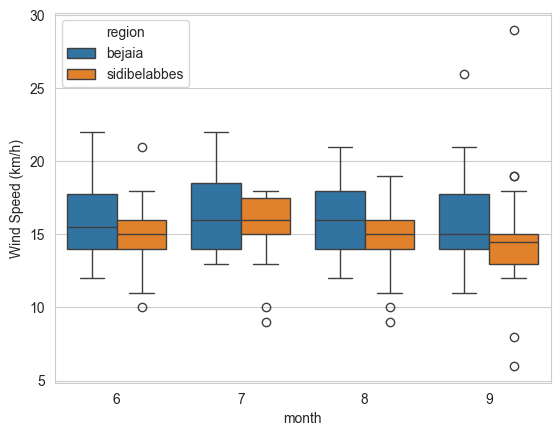

In [54]:
sns.boxplot(data=combo_renamed, x = 'month', y = 'Wind Speed', hue = 'region')
plt.ylabel('Wind Speed (km/h)')
plt.show()

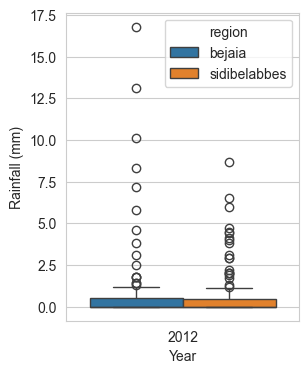

In [55]:
plt.figure(figsize=(3,4))
sns.boxplot(data=combo_renamed, x = 'year', y= 'Rainfall', hue = 'region')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.show()

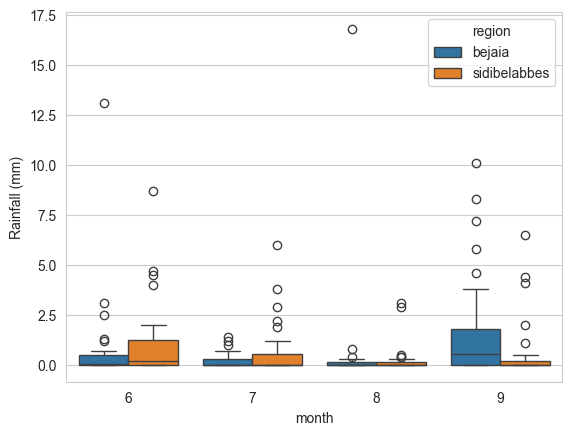

In [56]:
sns.boxplot(data=combo_renamed, x = 'month', y = 'Rainfall', hue = 'region')
plt.ylabel('Rainfall (mm)')
plt.show()

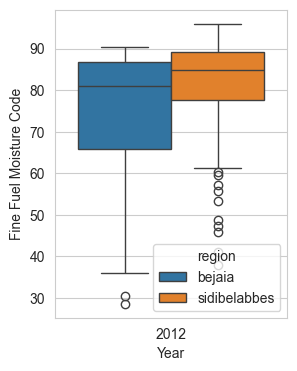

In [57]:
plt.figure(figsize=(3,4))
sns.boxplot(data=combo_renamed, x = 'year', y= 'Fine Fuel Moisture Code', hue = 'region')
plt.xlabel('Year')
plt.show()

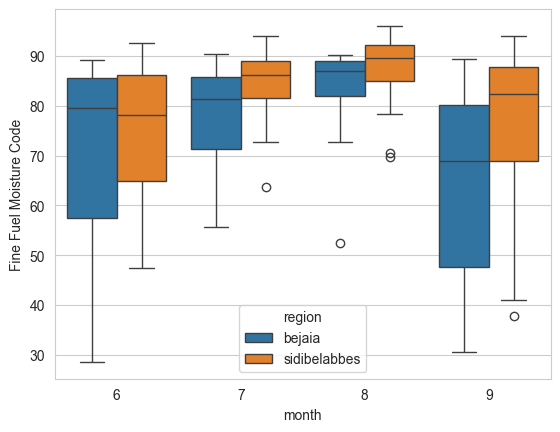

In [58]:
sns.boxplot(data=combo_renamed, x = 'month', y = 'Fine Fuel Moisture Code', hue = 'region')
plt.show()

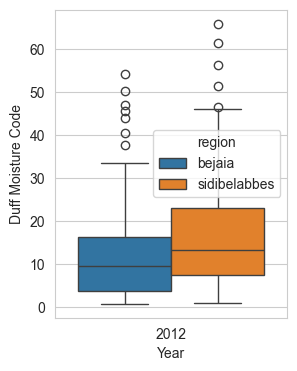

In [59]:
plt.figure(figsize=(3,4))
sns.boxplot(data=combo_renamed, x = 'year', y= 'Duff Moisture Code', hue = 'region')
plt.xlabel('Year')
plt.show()

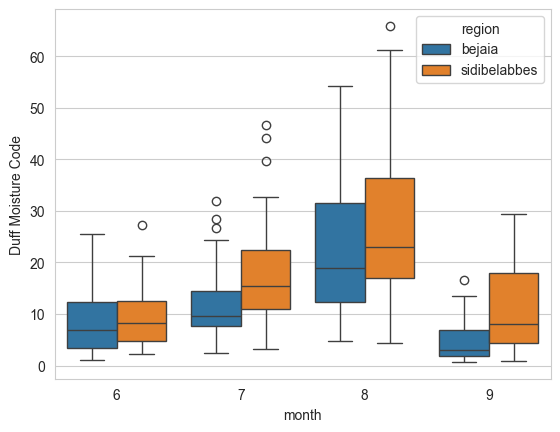

In [60]:
sns.boxplot(data=combo_renamed, x = 'month', y = 'Duff Moisture Code', hue = 'region')
plt.show()

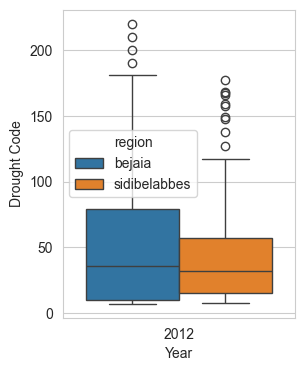

In [61]:
plt.figure(figsize=(3,4))
sns.boxplot(data=combo_renamed, x = 'year', y= 'Drought Code', hue = 'region')
plt.xlabel('Year')
plt.show()

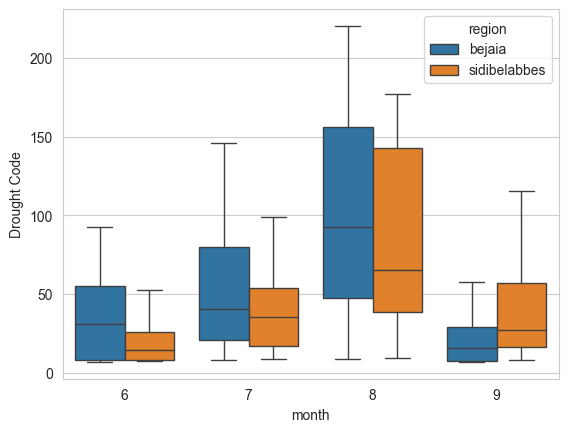

In [62]:
sns.boxplot(data=combo_renamed, x = 'month', y = 'Drought Code', hue = 'region')
plt.show()

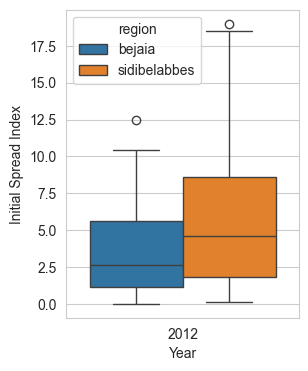

In [63]:
plt.figure(figsize=(3,4))
sns.boxplot(data=combo_renamed, x = 'year', y= 'Initial Spread Index', hue = 'region')
plt.xlabel('Year')
plt.show()

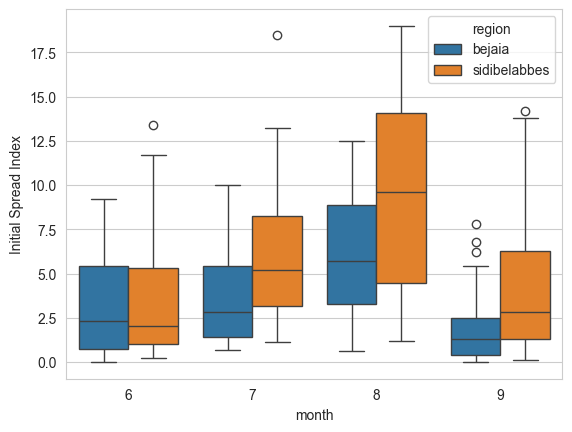

In [64]:
sns.boxplot(data=combo_renamed, x = 'month', y = 'Initial Spread Index', hue = 'region')
plt.show()

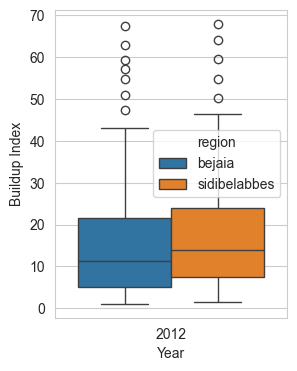

In [65]:
plt.figure(figsize=(3,4))
sns.boxplot(data=combo_renamed, x = 'year', y= 'Buildup Index', hue = 'region')
plt.xlabel('Year')
plt.show()

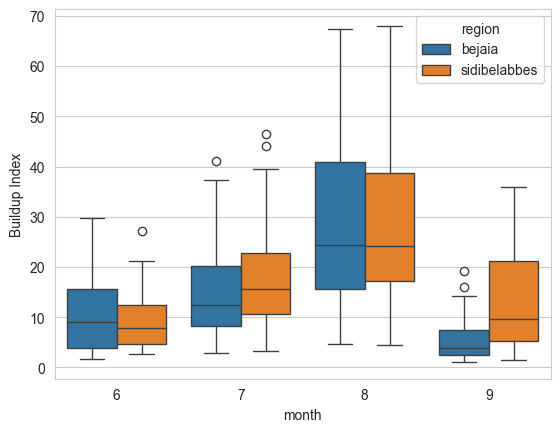

In [66]:
sns.boxplot(data=combo_renamed, x = 'month', y = 'Buildup Index', hue = 'region')
plt.show()

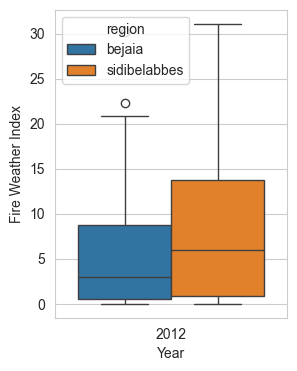

In [67]:
plt.figure(figsize=(3,4))
sns.boxplot(data=combo_renamed, x = 'year', y= 'Fire Weather Index', hue = 'region')
plt.xlabel('Year')
plt.show()

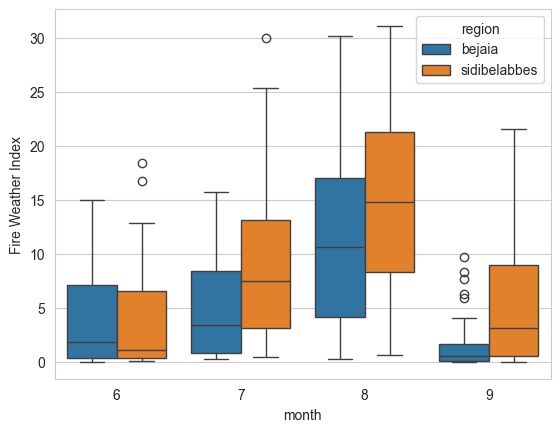

In [68]:
sns.boxplot(data=combo_renamed, x = 'month', y = 'Fire Weather Index', hue = 'region')
plt.show()

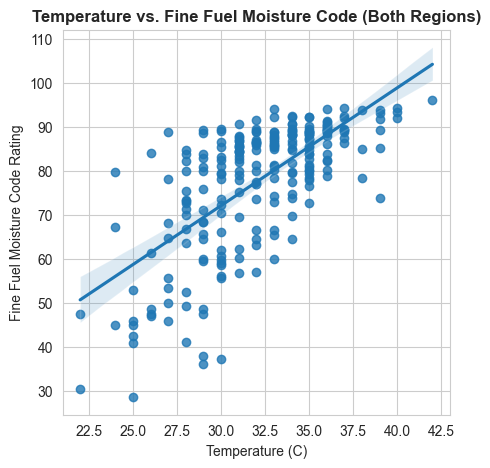

In [69]:
plt.figure(figsize=(5,5))
sns.set_style('whitegrid')
sns.regplot(data = combo, x = 'temperature', y = 'ffmc')
plt.title('Temperature vs. Fine Fuel Moisture Code (Both Regions)', weight = 'bold')
plt.xlabel('Temperature (C)')
plt.ylabel('Fine Fuel Moisture Code Rating')
plt.show()

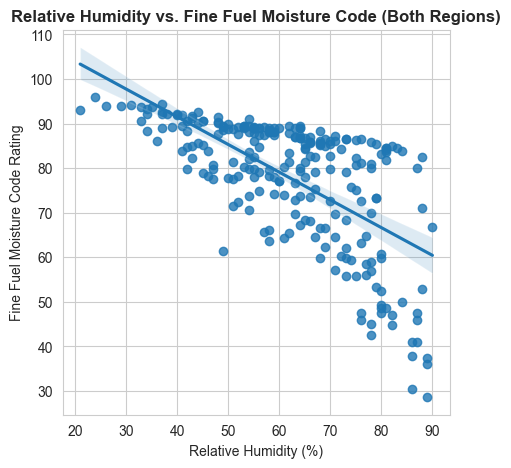

In [70]:
plt.figure(figsize=(5,5))
sns.regplot(data = combo, x = 'rh', y = 'ffmc')
plt.title('Relative Humidity vs. Fine Fuel Moisture Code (Both Regions)', weight = 'bold')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Fine Fuel Moisture Code Rating')
plt.show()

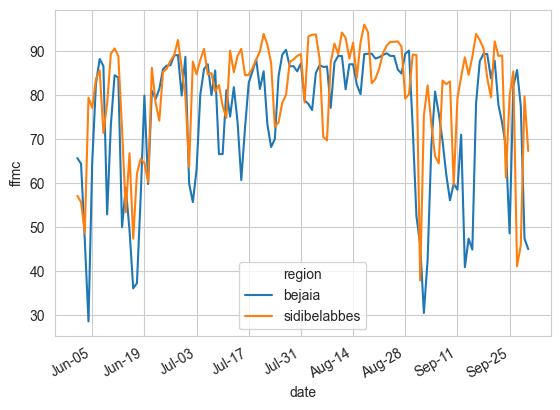

In [71]:
sns.lineplot(data= combo, x = 'date', y='ffmc', hue = 'region')
# Format the x-axis
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))  # Change interval to adjust the spacing
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))  # Format the dates

# Rotate date labels
plt.gcf().autofmt_xdate()
plt.show()

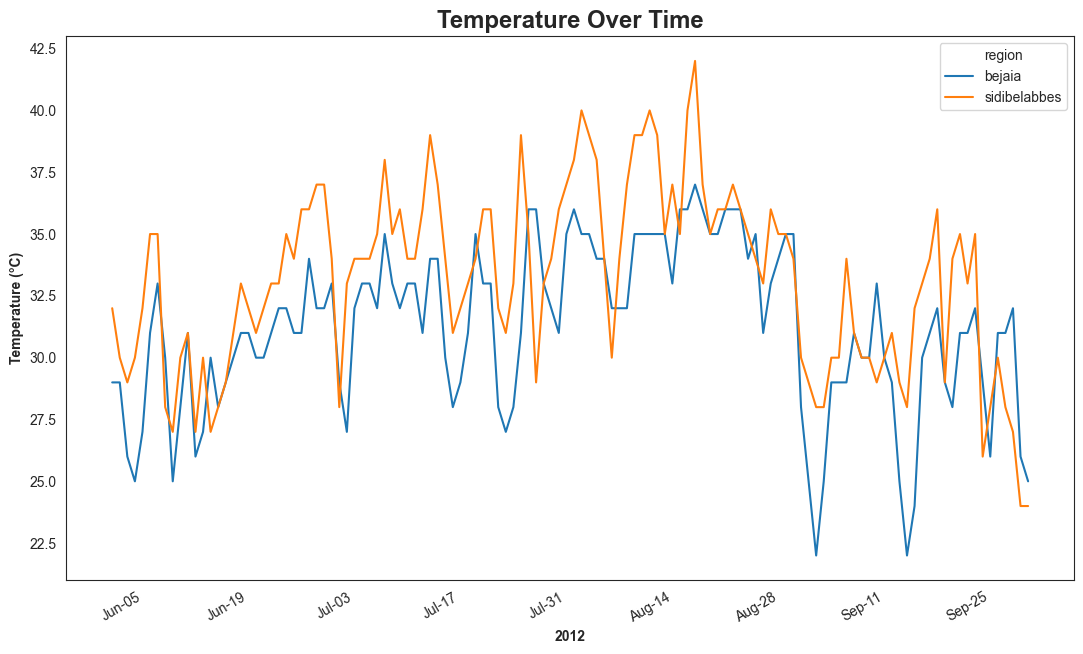

In [72]:
plt.figure(figsize=(13,8))
sns.set_style('white')
sns.lineplot(data= combo, x = 'date', y='temperature', hue = 'region')
plt.title('Temperature Over Time',
          fontsize = 'xx-large', 
          weight = 'bold')
plt.xlabel('2012',
           weight = 'bold')
plt.ylabel('Temperature (°C)',
           weight = 'bold')

# Format the x-axis
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))  # Change interval to adjust the spacing
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))  # Format the dates

# Rotate date labels
plt.gcf().autofmt_xdate()
plt.show()

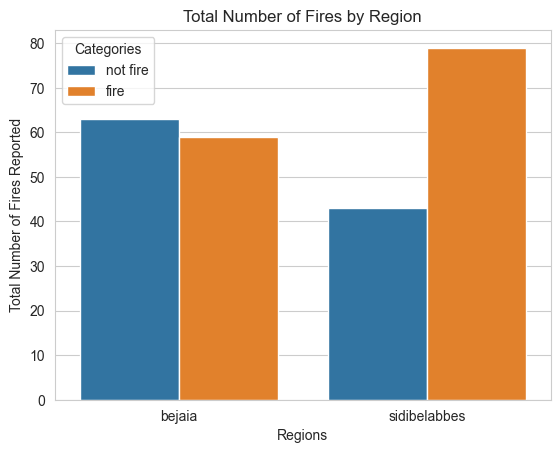

In [73]:
sns.set_style('whitegrid')
sns.countplot(data = combo, x = 'region', hue = 'classes')
plt.title('Total Number of Fires by Region')
plt.ylabel('Total Number of Fires Reported')
plt.xlabel('Regions')
plt.legend(title= 'Categories')
plt.show()

### Comparing the Means of Both Regions

In [74]:
bej_temp = bejaia[['temperature']]
sid_temp = sid[['temperature']]

t_stat, p_val = ttest_ind(bej_temp, sid_temp)
print(f't-statistic: {t_stat}, p-value: {p_val}')

t-statistic: [-4.42324528], p-value: [1.47019083e-05]


The results of the t-test indicate there is a significant difference in the mean temperatures of both regions (can be seen in the line graph above).  This can be further explored to make connections between the different variables affecting the chances of forest fires.

In [75]:
bej_rh = bejaia[['rh']]
sid_rh = sid[['rh']]

t_stat, p_val = ttest_ind(bej_rh, sid_rh)
print(f't-statistic: {t_stat}, p-value: {p_val}')

t-statistic: [6.91975227], p-value: [4.02477546e-11]


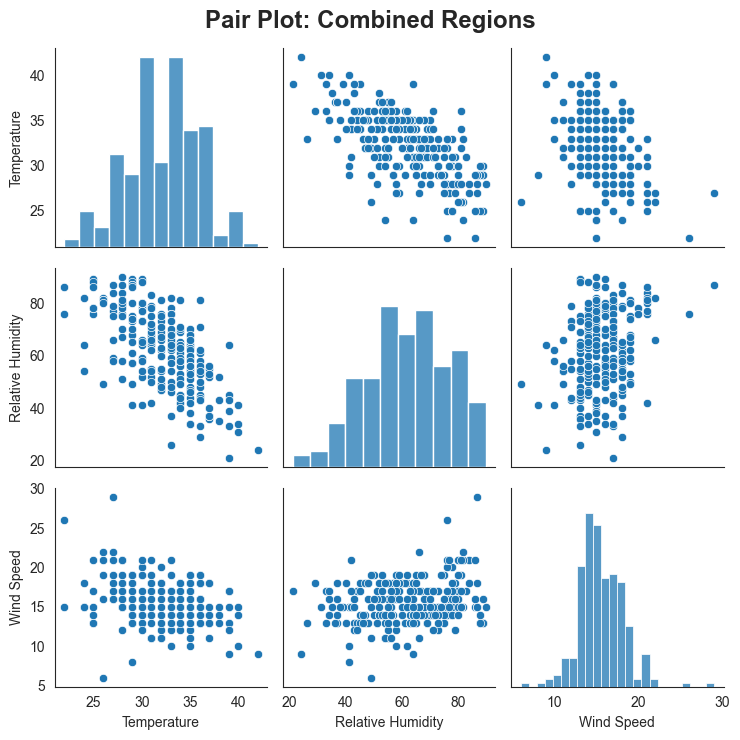

In [76]:
sns.set_style('white')
sns.pairplot(combo_renamed[['Temperature',
                         'Relative Humidity',
                         'Wind Speed', 'region']])
plt.suptitle('Pair Plot: Combined Regions',
             fontsize = 'xx-large', 
             weight = 'bold')
plt.tight_layout()
plt.show()

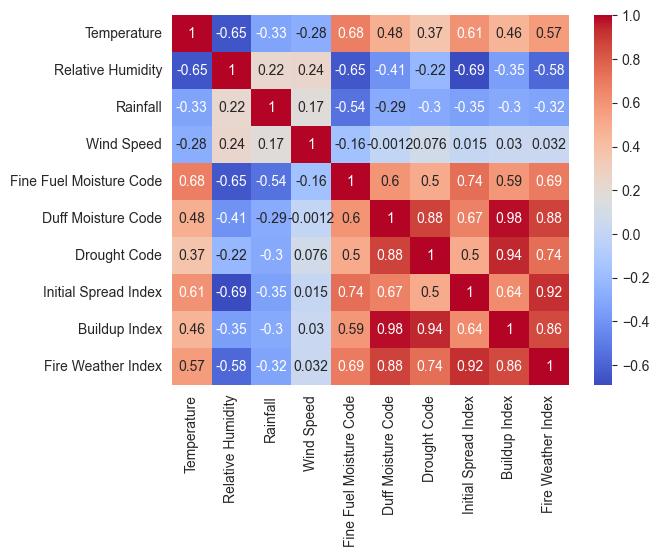

In [77]:
combo_mx = combo_renamed[['Temperature',
                      'Relative Humidity',
                      'Rainfall',
                      'Wind Speed',
                      'Fine Fuel Moisture Code',
                      'Duff Moisture Code',
                      'Drought Code',
                      'Initial Spread Index',
                      'Buildup Index',
                      'Fire Weather Index']].corr()
sns.heatmap(combo_mx, annot= True, cmap= 'coolwarm')
plt.show()